# 8.3.2 Detección de outliers usando EllipticEnvelope

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.covariance import EllipticEnvelope

import warnings
warnings.filterwarnings("ignore")

Link: https://youtu.be/p5OTQ_d9yFw?si=eVTLcMAMUOzFFjQT

Links: https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html

En esta lección se aborda el problema de la detección de outliers en la muestra de entrenamiento suponiendo que los datos provienen de una distribución normal multivarida.

Esta metodología se basa en la computación de la probabilidad de ocurrencia (o la lejanía de un punto respecto al centro de los datos) si los datos siguen una disttribución normal multivariada. Ya que de antemano se supone la presencia de outliers, el vector de centros y la matriz de covarianzas se deben estimar usando métodos robustos (es decir, que no sean influenciados por las observaciones atípicas).

En esta metodología se usa la distancia de Mahalanobis para derivar una medida que indica que tan lejano es un punto.

In [3]:
true_cov = np.array(
    [
        [0.8, 0.3],
        [0.3, 0.4],
    ]
)


X = np.random.RandomState(0).multivariate_normal(
    mean=[0, 0],
    cov=true_cov,
    size=500,
)

cov = EllipticEnvelope(
    # -----------------------------------------------------
    # The data is centered?
    assume_centered=False,
    # -----------------------------------------------------
    # The amount of contamination of the data set
    contamination=0.1,
    # -----------------------------------------------------
    # The proportion of points to be included in the
    # support of the raw MCD estimate.
    support_fraction=None,
    # -----------------------------------------------------
    # Determines the pseudo random number generator for
    # shuffling the data.
    random_state=0,
)

cov.fit(X)
#
# El objeto entrenado contiene los siguientes atributos:
#   location_
#   covariance_
#   support_
#

EllipticEnvelope(random_state=0)

In [4]:
cov.location_

array([0.0813539 , 0.04279722])

In [5]:
cov.covariance_

array([[0.74118335, 0.25357049],
       [0.25357049, 0.30531502]])

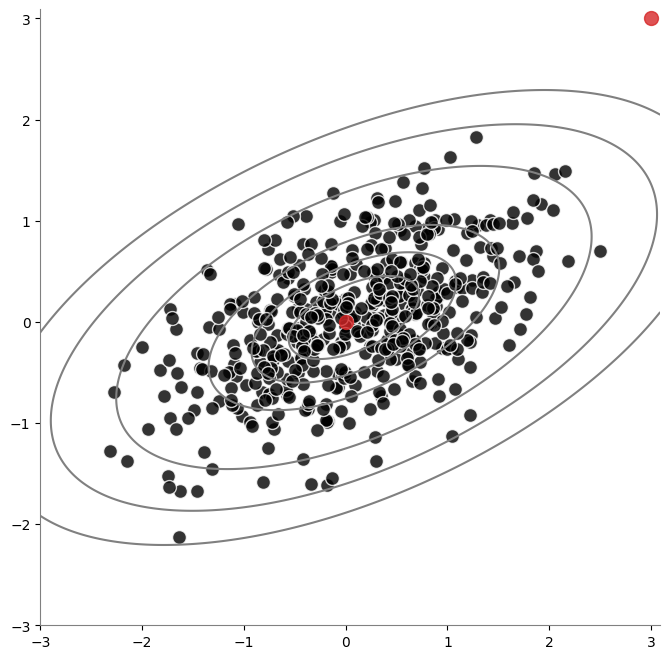

In [6]:
plt.figure(figsize=(8, 8))

plt.scatter(
    x=X[:, 0],
    y=X[:, 1],
    c="k",
    s=100,
    marker="o",
    alpha=0.8,
    label="Yes",
    edgecolors="white",
)

plt.scatter(
    x=[0, 3],
    y=[0, 3],
    c="tab:red",
    s=100,
    marker="o",
    alpha=0.8,
    label="Yes",
)

x_, y_ = np.mgrid[-3:3.1:0.01, -3:3.1:0.01]
pos = np.dstack((x_, y_))

rv = multivariate_normal(cov.location_, cov.covariance_)
plt.contour(
    x_,
    y_,
    rv.pdf(pos),
    colors="gray",
    levels=[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    alpha=1.0,
)

plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

In [7]:
#
# Un valor de +1 indica que el punto es un inlier
# y un -1 indica que es un outlier
#
cov.predict([[0, 0], [3, 3]])

array([ 1, -1])

In [8]:
print('ok_')

ok_
